In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from keras.utils import np_utils

dataframe = pd.read_csv('LaundryData_2021_T2.csv')
#showing our initial dataframe here
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,short_sleeve,blue_jeans,long,NaN,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,NaN,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,NaN,white,long,clothes,3,9,NaN,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [18]:
dataframe.isnull().sum()

Date                0
Time                0
Race              198
Gender            177
Body_Size         183
Age_Range         143
With_Kids         186
Kids_Category      30
Basket_Size       205
Basket_colour     203
Attire            217
Shirt_Colour      174
shirt_type        185
Pants_Colour      174
pants_type          9
Wash_Item         181
Washer_No           0
Dryer_No            0
Spectacles        209
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [19]:
dataframe.isnull().sum() * 100 / len(dataframe)

Date              0.000
Time              0.000
Race              4.950
Gender            4.425
Body_Size         4.575
Age_Range         3.575
With_Kids         4.650
Kids_Category     0.750
Basket_Size       5.125
Basket_colour     5.075
Attire            5.425
Shirt_Colour      4.350
shirt_type        4.625
Pants_Colour      4.350
pants_type        0.225
Wash_Item         4.525
Washer_No         0.000
Dryer_No          0.000
Spectacles        5.225
latitude          0.000
longitude         0.000
Num_of_Baskets    4.550
dtype: float64

In [20]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

# Data Preprocessing

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [23]:
imputed_data = imp.fit_transform(dataframe)

In [24]:
dataframe = pd.DataFrame(imputed_data, columns = dataframe.columns)

In [25]:
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.73717,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.90353,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.64306,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.13653,101.699091,1.0


In [26]:
dataframe.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [27]:
dataframe['Age_Range'] = dataframe.Age_Range.astype(float)
dataframe['Washer_No'] = dataframe.Washer_No.astype(np.int64)
dataframe['Dryer_No'] = dataframe.Dryer_No.astype(np.int64)
dataframe['latitude'] = dataframe.latitude.astype(float)
dataframe['longitude'] = dataframe.longitude.astype(float)
dataframe['Num_of_Baskets'] = dataframe.Num_of_Baskets.astype(float)

In [28]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

# Neural Net (Age Range - Binned)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical

In [30]:
df_LE = dataframe.copy()
from sklearn.preprocessing import LabelEncoder

bins = [0,10,20,30,40,50,60,70,80,90,100]
df_LE['Age_Range'] = pd.cut(df_LE['Age_Range'], bins)

y = df_LE.Age_Range
X = df_LE.drop("Age_Range", 1)
X = X.apply(LabelEncoder().fit_transform)
#y = y.apply(LabelEncoder().fit_transform)
y.nunique()

C:\Users\iamsp\AppData\Local\Temp\ipykernel_100856\1576852975.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_LE.drop("Age_Range", 1)


5

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ss = sc.fit_transform(X)
print(X_ss)

[[-1.55423745  0.96512952  1.20078836 ... -1.64934543 -0.01948557
  -1.15324345]
 [-1.55423745  0.98937923  1.20078836 ... -1.54022623 -0.33904896
   1.27144711]
 [-1.55423745  1.0733205   1.20078836 ... -1.39646601  1.28215065
  -1.15324345]
 ...
 [-1.31676915 -1.57922386 -0.53288911 ...  0.34597716 -0.34164703
  -1.15324345]
 [ 0.6126608  -1.72472207  0.33394962 ...  1.09508916  0.63609568
  -1.15324345]
 [ 0.3751925  -0.56819781 -1.39972785 ...  0.86299434  0.6880572
  -1.15324345]]


In [32]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y_one_hot = np_utils.to_categorical(encoded_Y)
y_one_hot.shape

(4000, 5)

In [87]:
model = Sequential()
model.add(Dense(32, input_dim=21, activation='sigmoid'))
model.add(Dense(16, activation = "sigmoid"))
model.add(Dense(5, activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [89]:
model.summary()
model.save('sigmoid_age.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                704       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,317
Trainable params: 1,317
Non-trainable params: 0
_________________________________________________________________


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [37]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=64)

Epoch 1/200
57/57 [==============================] - 1s 5ms/step - loss: 1.6651 - accuracy: 0.2439 - val_loss: 1.5879 - val_accuracy: 0.2475
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5784 - accuracy: 0.2425 - val_loss: 1.5473 - val_accuracy: 0.2450
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5535 - accuracy: 0.2467 - val_loss: 1.5341 - val_accuracy: 0.2525
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5428 - accuracy: 0.2433 - val_loss: 1.5274 - val_accuracy: 0.2550
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5356 - accuracy: 0.2531 - val_loss: 1.5235 - val_accuracy: 0.2575
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5298 - accuracy: 0.2567 - val_loss: 1.5202 - val_accuracy: 0.2650
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 1.5251 - accuracy: 0.2558 - val_loss: 1.5180 - val_accuracy: 0.2550
Epoch 8/200
5

# Neural Net (Number of Buckets)

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical

In [39]:
df_LE = dataframe.copy()
from sklearn.preprocessing import LabelEncoder

# bins = [0,10,20,30,40,50,60,70,80,90,100]
# df_LE['Age_Range'] = pd.cut(df_LE['Age_Range'], bins)

y = df_LE.Num_of_Baskets
X = df_LE.drop("Num_of_Baskets", 1)
X = X.apply(LabelEncoder().fit_transform)
#y = y.apply(LabelEncoder().fit_transform)
y.nunique()

C:\Users\iamsp\AppData\Local\Temp\ipykernel_100856\169956979.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_LE.drop("Num_of_Baskets", 1)


3

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ss = sc.fit_transform(X)
print(X_ss)

[[-1.55423745  0.96512952  1.20078836 ... -0.84095956 -1.64934543
  -0.01948557]
 [-1.55423745  0.98937923  1.20078836 ... -0.84095956 -1.54022623
  -0.33904896]
 [-1.55423745  1.0733205   1.20078836 ... -0.84095956 -1.39646601
   1.28215065]
 ...
 [-1.31676915 -1.57922386 -0.53288911 ... -0.84095956  0.34597716
  -0.34164703]
 [ 0.6126608  -1.72472207  0.33394962 ... -0.84095956  1.09508916
   0.63609568]
 [ 0.3751925  -0.56819781 -1.39972785 ...  1.18911783  0.86299434
   0.6880572 ]]


In [41]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y_one_hot = np_utils.to_categorical(encoded_Y)
y_one_hot.shape

(4000, 3)

In [80]:
model = Sequential()
model.add(Dense(16, input_dim=21, activation='relu'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [82]:
model.summary()
model.save('myModel_2.h5')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                352       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 3)                 27        
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [75]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=64)

Epoch 1/200
57/57 [==============================] - 1s 5ms/step - loss: 1.1671 - accuracy: 0.3194 - val_loss: 1.1287 - val_accuracy: 0.3050
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 1.1131 - accuracy: 0.3144 - val_loss: 1.1049 - val_accuracy: 0.3150
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 1.0998 - accuracy: 0.3361 - val_loss: 1.0994 - val_accuracy: 0.3300
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 1.0963 - accuracy: 0.3597 - val_loss: 1.0985 - val_accuracy: 0.3425
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 1.0957 - accuracy: 0.3700 - val_loss: 1.0981 - val_accuracy: 0.3425
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 1.0955 - accuracy: 0.3683 - val_loss: 1.0983 - val_accuracy: 0.3525
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 1.0954 - accuracy: 0.3692 - val_loss: 1.0985 - val_accuracy: 0.3525
Epoch 8/200
5

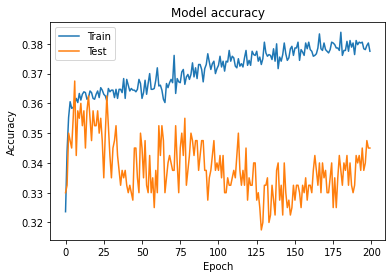

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

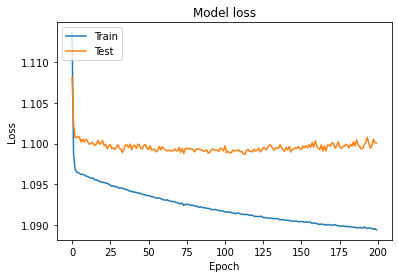

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()